In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import random
import statistics

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,Y_train) , (X_test,Y_test) = mnist.load_data()

In [4]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [5]:
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])

outline = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

In [6]:
def calculateOutputSize(imgSize, kernelSize):
    return imgSize - kernelSize + 1;

In [7]:
def convolve(img, kernel):
    outputSize = calculateOutputSize(img.shape[0],kernel.shape[0])
    k = kernel.shape[0]
    convolvedImage = np.zeros(shape=(outputSize, outputSize))
    for rowIndex in range(outputSize):
        for colIndex in range(outputSize):
            mat = img[rowIndex:rowIndex+k, colIndex:colIndex+k]
            convolvedImage[rowIndex, colIndex] = np.sum(np.multiply(mat, kernel))
            
    return convolvedImage

In [8]:
# X_train_convolve = []

# for img in X_train:
#     img = convolve(img,blur)
#     img = convolve(img,blur)
#     img = convolve(img,blur)
#     img = convolve(img,blur)
#     #img = convolve(img,blur)
#     X_train_convolve.append(img)

In [9]:
# X_train_convolve = np.array(X_train_convolve)

In [10]:
# X_test_convolve = []
# for img in X_test:
#     img = convolve(img,blur)
#     img = convolve(img,blur)
#     img = convolve(img,blur)
#     img = convolve(img,blur)
#     #img = convolve(img,blur)
#     X_test_convolve.append(img)

In [11]:
# X_test_convolve = np.array(X_test_convolve)  

In [12]:
# train_filter = np.where((Y_train == 0 ) | (Y_train == 1) | (Y_train == 2) | (Y_train == 3) | (Y_train == 4))
# test_filter = np.where((Y_test == 0) | (Y_test == 1) | (Y_test == 2) | (Y_test == 3) | (Y_test == 4))

In [13]:
class imagePreparation:
    def __init__(trainX , trainY , testX , testY):
        self.trainX = trainX
        self.trainY = trainY
        self.testX = testX
        self.testY = testy
    
    def giveData(need):
        data = []
        trainFilter = np.where()
        
        

In [14]:
train_filter = np.where((Y_train == 0 ) | (Y_train == 1) | (Y_train == 2))
test_filter = np.where((Y_test == 0) | (Y_test == 1) | (Y_test == 2))

In [15]:
X_train_filter, Y_train_filter = X_train[train_filter], Y_train[train_filter]
X_test_filter, Y_test_filter = X_test[test_filter], Y_test[test_filter]

In [16]:
train_filter_0 = np.where(Y_train == 0)
test_filter_0 = np.where(Y_test == 0)

X_train_filter_0 , Y_train_filter_0 = X_train[train_filter_0],Y_train[train_filter_0]
X_test_filter_0 , Y_test_filter_0 = X_test[test_filter_0] , Y_test[test_filter_0]

In [17]:
train_filter_1 = np.where(Y_train == 1)
test_filter_1 = np.where(Y_test == 1)

X_train_filter_1 , Y_train_filter_1 = X_train[train_filter_1],Y_train[train_filter_1]
X_test_filter_1 , Y_test_filter_1 = X_test[test_filter_1] , Y_test[test_filter_1]

In [18]:
# train_filter_3 = np.where(Y_train == 3)
# test_filter_3 = np.where(Y_test == 3)

# X_train_filter_3 , Y_train_filter_3 = X_train[train_filter_3],Y_train[train_filter_3]
# X_test_filter_3 , Y_test_filter_3 = X_test[test_filter_3] , Y_test[test_filter_3]

In [19]:
# train_filter_4 = np.where(Y_train == 4)
# test_filter_4 = np.where(Y_test == 4)

# X_train_filter_4 , Y_train_filter_4 = X_train[train_filter_4],Y_train[train_filter_4]
# X_test_filter_4 , Y_test_filter_4 = X_test[test_filter_4] , Y_test[test_filter_4]

In [20]:
train_filter_2 = np.where(Y_train == 2)
test_filter_2 = np.where(Y_test == 2)

X_train_filter_2 , Y_train_filter_2 = X_train[train_filter_2],Y_train[train_filter_2]
X_test_filter_2 , Y_test_filter_2 = X_test[test_filter_2] , Y_test[test_filter_2]

In [21]:
# Normalize the Images

In [22]:
X_train_filter = X_train_filter/255.0
X_test_filter = X_test_filter/255.0

In [23]:
X_train_filter_0 = X_train_filter_0/255.0
X_test_filter_0 = X_test_filter_0/255.0

In [24]:
X_train_filter_2 = X_train_filter_2/255.0
X_test_filter_2 = X_test_filter_2/255.0

In [25]:
X_train_filter_1 = X_train_filter_1/255.0
X_test_filter_1 = X_test_filter_1/255.0

In [26]:
# X_train_filter_3 = X_train_filter_3/255.0
# X_test_filter_3 = X_test_filter_3/255.0

In [27]:
# X_train_filter_4 = X_train_filter_4/255.0
# X_test_filter_4 = X_test_filter_4/255.0

In [28]:
X_train_filter_0[1].shape

(28, 28)

In [29]:
# Flattening the Input

In [30]:
def flattenInput(mat):
        mat = mat.flatten()
        mat = mat.reshape(mat.shape[0],1)
        return mat

In [31]:
# Weight Initialization(Random,Normalized)

In [32]:
def weightInitialization(rows , cols, type = "random"):
    if(type == "random"):
        initialWeights = np.random.random(size = (rows,cols))
    else:
        initialWeights = np.random.normal(size = (rows,cols))
    initialWeights = initialWeights.reshape(rows,cols)
    return initialWeights

In [33]:
weights = weightInitialization(784,20,"normalize")

In [34]:
weights.shape

(784, 20)

In [35]:
# Manipulating the Array

In [36]:
def manipulatingTheArray(mat):
    mat = flattenInput(mat)
    
    for index in range(mat.shape[0]): 
        if mat[index] == 0:
            mat[index] = -0.002
    return mat

In [37]:
# Thresholding Weight

In [38]:
def thresholding(out):
    for item in range(out.shape[1]):
        if out[0][item] >= 0.8:
            out[0][item] = 0.8
        elif out[0][item] >= 0.5 and out[0][item] < 0.8:
            out[0][item] = 0.5
        elif out[0][item] > 0.1 and out[0][item] < 0.5:
            out[0][item] = 0.3
        else:
            out[0][item] = 0.1
    return out

In [39]:
def ActThresholding(out):
    for item in range(out.shape[1]):
        if out[0][item] >= 0.9:
            out[0][item] = 0.9
        else:
            out[0][item] = -0.9
    return out

In [40]:
# Threshold Check

In [41]:
def crossThreshold(out,neuronThreshold):
    flag = 0
    for item in range(out.shape[1]):
        if out[0][item] > neuronThreshold[0][item]:
            neuronThreshold[0][item] += 0.2
            flag = 1
    
    if flag == 1:
        return True
    return False

In [42]:
def crossThresholdUpdate(afterActivation,neuronThreshold):
    flag = 0
    for item in range(afterActivation.shape[1]):
        if afterActivation[0][item] > 0.8:
            neuronThreshold[0][item] += 0.002
            afterActivation[0][item] = 0
        else:
            afterActivation[0][item] = afterActivation[0][item] - 0.001
            #neuronThreshold[0][item] -= 0.001
            
    return afterActivation,neuronThreshold

In [43]:
# Weight Threshold (Future Reference)

In [44]:
def weightThreshold(weight):
    for indexi in range(weight.shape[0]):
        for indexj in range(weight.shape[1]):
            if weight[indexi][indexj] >= 1:
                weight[indexi][indexj] = 1
    return weight

In [45]:
# Calculate Accuracy

In [46]:
def accuracy(data,finalWeight):
    predict_0 = []
    predict_7 = []
    for item in data:
        item = flattenInput(item)
        res = np.dot(item.T,finalWeight)
        res = np.median(res)
        if res >= 55 and res <= 85:
            predict_0.append(1)
        elif res >=30 and res <55:
            predict_7.append(1)
    return len(predict_0), len(predict_7)

In [47]:
# Print Results

In [48]:
def printResults(inputImage,finalWeight):
    result = []
    for item in inputImage:
        item = flattenInput(item)
        #item = manipulatingTheArray(item)
        result.append(np.dot(item.T,finalWeight))
    return result

In [49]:
def printResultsBlock(inputImage,weight):
    result = []
    resultSum = []
    for item in inputImage:
        item = flattenInput(item)
        #item = manipulatingTheArray(item)
        
        startIndex = 0
        blockSize = 7
        pval = 0
        resultRow = []
        sum_ = 0
        while(startIndex < 784):
            image_ = item[startIndex:startIndex + blockSize]
            weight_ = weight[startIndex : startIndex + blockSize]
                
            resultDotProduct = np.dot(image_.T,weight_)
            sum_ = sum_ + resultDotProduct
            resultRow.append(resultDotProduct)
            startIndex += blockSize
            
        result.append(resultRow)
        resultSum.append(sum_)
    return result , resultSum



In [50]:
def printResultsBlockIncludingAnotherLayer(inputImage,weight1,weight2):
    result = []
    resultSum = []
    for item in inputImage:
        item = flattenInput(item)
        #item = manipulatingTheArray(item)
        
        startIndex = 0
        blockSize = 28
        pval = 0
        resultRow = []
        sum_ = 0
        while(startIndex < 784):
            image_ = item[startIndex:startIndex + blockSize]
            weight_ = weight1[startIndex : startIndex + blockSize]
                
            resultDotProduct = np.dot(image_.T,weight_)
            sum_ = sum_ + resultDotProduct
            resultRow.append(resultDotProduct)
            startIndex += blockSize
            
        #result.append(resultRow)
        
        resultRow = np.array(resultRow)
        ans = np.dot(resultRow.T,weight2)
        result.append(ans)
        
    return result , resultRow


In [51]:
def printResults2(inputImage,weight1,weight2):
    result = []
    for item in inputImage:
        item = flattenInput(item)
        out = np.dot(item.T,weight1)
        out = np.dot(out,weight2)
        result.append(out)
    return result

In [52]:
testFlatten = []

for image_ in X_test:
        image_ = flattenInput(image_)
        testFlatten.append(image_)

In [53]:
def convertToBinary(activation,neuronThreshold):
    for index in range(activation[0].shape[0]):
        
        if activation[0][index] > neuronThreshold[0][index]:
            activation[0][index] = 0.9
        else:
            
            activation[0][index] = 0.001
            
    return activation

In [54]:
def binaryConversion(image):
    
    for index in range(image.shape[0]):
        if image[index] != 0:
            image[index] = 1
    
    return image

In [55]:
testFlatten[0].shape

(784, 1)

In [56]:
x = np.full((4),1)

In [57]:
x

array([1, 1, 1, 1])

In [58]:
# Weight Update

In [59]:
def weightUpdateContainingMemoryElement(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)
    out = np.array(0)
    alpha =1e-5 #4 
    beta = 1e-7 #5
     # alpha , beta = 1e-3 , 1e-2 
    # alpha ,beta = 1e-1,1e-2 best values
    
    thresholdNeurons = np.full((1,20),0.02)
    for epoch_ in range(epoch):
            random.shuffle(flattenImage)
            for input_ in flattenImage:
                    out = alpha * np.dot(input_.T , weight) + out 
                    #out = ActThresholding(out)
                    inputM = manipulatingTheArray(input_)
                    weight = weight + beta * np.dot(input_,out)
                    weight = weightThreshold(weight)
                    if(crossThreshold(out,thresholdNeurons)):
                       out = 0.0
                    else:
                       out = out - beta * 0.01
            
            print(f"Epoch number {epoch_} finishes")
    return weight

In [60]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)   
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

In [61]:
def weightUpdateThresholding(epoch,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        image_ = binaryConversion(image_)
        flattenImage.append(image_)
    activation = np.array(0)
    alpha =1e-5 #4 
    beta = 1e-7 #5
    
    
    
    thresholdNeurons = np.full((1,200),0.02)
    for epoch_ in range(epoch):
            random.shuffle(flattenImage)
            for input_ in flattenImage:
                    activation = alpha * np.dot(input_.T , weight) + activation
                    #out = ActThresholding(out)
                    afterActivation = convertToBinary(activation,thresholdNeurons)
                    #weight = weight + beta * np.dot(input_,afterActivation)
                    
                    
                    
                    afterActivation , thresholdNeuron = crossThresholdUpdate(afterActivation,thresholdNeurons)
                    weight = weight + beta * np.dot(input_,afterActivation)
                    activation = afterActivation
            
            print(f"Epoch number {epoch_} finishes")
    return weight

In [62]:
def weightUpdateThresholding(epoch,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        image_ = binaryConversion(image_)
        flattenImage.append(image_)
    activation = np.array(0)
    alpha =1e-5 #4 
    beta = 1e-7 #5
    
    
    
    thresholdNeurons = np.full((1,201),0.02)
    for epoch_ in range(epoch):
            random.shuffle(flattenImage)
            for input_ in flattenImage:
                    activation = alpha * np.dot(input_.T , weight) + activation
                    #out = ActThresholding(out)
                    afterActivation = convertToBinary(activation,thresholdNeurons)
                    #weight = weight + beta * np.dot(input_,afterActivation
                    
                    afterActivation , thresholdNeuron = crossThresholdUpdate(afterActivation,thresholdNeurons)
                    weight = weight + beta * np.dot(input_,afterActivation)
                    activation = afterActivation
            
            print(f"Epoch number {epoch_} finishes")
    return weight

In [63]:
def multipleBlocks(epoch, inputImage, weight):
    flattenImage = []
    check  = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)
    #creating block of images
    #print(flattenImage[0])
    
    index = 0
    blockSize = 28
    
    alpha = 0.1
    for epoch_ in range(epoch):
        random.shuffle(flattenImage)
        for input_ in flattenImage:
            
            startIndex = 0
            errorFromThePreviousLevel = 0
            prevVal = 0
            val = 0
            pVal = 0
            while(startIndex < 784):
                image_ = input_[startIndex:startIndex + blockSize]
                weight_ = weight[startIndex : startIndex + blockSize]
                
                dotProduct =  np.dot(image_.T,weight_)
                
                if dotProduct  >= 5 and dotProduct < 1000:
                    for index in range(weight_.shape[0]):
                        check.append("increase")
                        if weight_[index] < 200:
                            weight_[index] = weight_[index] + alpha * dotProduct
                elif dotProduct < 2:
                     for index in range(weight_.shape[0]):
                        check.append("decrease")
                        if weight_[index] > -200:
                            weight_[index] = weight_[index] - alpha * dotProduct
                startIndex += blockSize
        
        print(f"Epoch : {epoch_} Completed")
    
    return weight , check


In [64]:
def multipleBlocksWithMemoryElement(epoch, inputImage, weight1 , weight2):
    flattenImage = []
    check  = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    
    index = 0
    blockSize = 28
    blockIndex = 0
    output = np.full((28,1),0)
    output2Layer = np.full((3,1),0)
    alpha = 0.1
    for epoch_ in range(epoch):
        random.shuffle(flattenImage)
        output.fill(0)
        output2Layer.fill(0)
        for input_ in flattenImage:
            
            startIndex = 0
            blockIndex = 0
            while(startIndex < 784):
                image_ = input_[startIndex:startIndex + blockSize]
                weight_ = weight1[startIndex : startIndex + blockSize]
                dotProduct =  np.dot(image_.T,weight_)
                output[blockIndex] = output[blockIndex] + dotProduct
                
                if dotProduct  >= 5 and dotProduct < 200:
                    for index in range(weight_.shape[0]):
                        if weight_[index] < 50 and weight_[index] > 0:
                            weight_[index] = weight_[index] + alpha * output[blockIndex]
                elif dotProduct < 5:
                     for index in range(weight_.shape[0]):
                        if weight_[index] > -50 and weight_[index] < 3:
                            weight_[index] = weight_[index] - alpha * output[blockIndex]
                startIndex += blockSize
                
                if(output[blockIndex] > 100):
                    output[blockIndex] = 0
                else:
                    output[blockIndex] = output[blockIndex] -  alpha * 0.9
                blockIndex += 1
            #print(output)
            output2nLayer = np.dot(output.T,weight2)
            output2Layer[0] = output2Layer[0] + output2nLayer[0][0]
            output2Layer[1] = output2Layer[1] + output2nLayer[0][1]
            output2Layer[2] = output2Layer[2] + output2nLayer[0][2]
            
            for index in range(3):
                if(output2Layer[index] > 200):
                    output2Layer[index] = 0
                else:
                    output2Layer[index] = output2Layer[index] -  alpha * 20
            #print(output2nLayer.shape)
            #print(output2nLayer)
            for outputNeuronIndex in range(output2nLayer.shape[1]):
                 #print(output2nLayer[0][outputNeuronIndex])
                if output2Layer[outputNeuronIndex] > 20:
                    for index in range(weight2.shape[0]):
                        #print(weight2[index][outputNeuronIndex])
                        if weight2[index][outputNeuronIndex] < 100 and output[index] > 30:
                            weight2[index][outputNeuronIndex] = weight2[index][outputNeuronIndex] + alpha * output2Layer[outputNeuronIndex] + alpha * output[index]
                            #weight2[index][outputNeuronIndex] = weight2[index][outputNeuronIndex] + alpha * output[]
                            #print(weight2[index][outputNeuronIndex]
                            
                else:
                    for index in range(weight2.shape[0]):
                        #print(weight2[index][outputNeuronIndex])
                        if weight2[index][outputNeuronIndex] > -100 and weight2[index][outputNeuronIndex] < 0:
                            weight2[index][outputNeuronIndex] = weight2[index][outputNeuronIndex] - alpha * output2Layer[outputNeuronIndex] - alpha * output[index]
                
                        
    #print(f"Epoch : {epoch_} Completed")
    return weight1 , weight2 , check , output


In [65]:
def hidden(epoch, inputImage, weight1 , weight2):
    flattenImage = []
    check  = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    
    index = 0
    blockSize = 28
    blockIndex = 0
    output = np.full((28,1),0)
    output2Layer = np.full((3,1),0)
    alpha = 0.1
    for epoch_ in range(epoch):
        random.shuffle(flattenImage)
        output.fill(0)
        output2Layer.fill(0)
        for input_ in flattenImage:
            
            startIndex = 0
            blockIndex = 0
            while(startIndex < 784):
                image_ = input_[startIndex:startIndex + blockSize]
                weight_ = weight1[startIndex : startIndex + blockSize]
                dotProduct =  np.dot(image_.T,weight_)
                output[blockIndex] = output[blockIndex] + dotProduct
                
                if dotProduct  >= 5 and dotProduct < 200:
                    for index in range(weight_.shape[0]):
                        if weight_[index] < 50 and weight_[index] > 0:
                            weight_[index] = weight_[index] + alpha * output[blockIndex]
                elif dotProduct < 5:
                     for index in range(weight_.shape[0]):
                        if weight_[index] > -50 and weight_[index] < 3:
                            weight_[index] = weight_[index] - alpha * output[blockIndex]
                startIndex += blockSize
                
                if(output[blockIndex] > 100):
                    output[blockIndex] = 0
                else:
                    output[blockIndex] = output[blockIndex] -  alpha * 0.9
                blockIndex += 1
            #print(output)
            output = np.array(normalize(output,0,1))
            
            output2nLayer = np.dot(output.T,weight2)
            output2Layer[0] = output2Layer[0] + output2nLayer[0][0]
            output2Layer[1] = output2Layer[1] + output2nLayer[0][1]
            output2Layer[2] = output2Layer[2] + output2nLayer[0][2]
            
            output2Layer = np.array(normalize(output2Layer,0,1))
            
            for index in range(3):
                if(output2Layer[index] > 200):
                    output2Layer[index] = 0
                else:
                    output2Layer[index] = output2Layer[index] -  alpha * 0.9
            #print(output2nLayer.shape)
            #print(output2nLayer)
            for outputNeuronIndex in range(output2nLayer.shape[1]):
                 #print(output2nLayer[0][outputNeuronIndex])
                if output2Layer[outputNeuronIndex] > 20:
                    for index in range(weight2.shape[0]):
                        #print(weight2[index][outputNeuronIndex])
                        if weight2[index][outputNeuronIndex] < 10:
                            weight2[index][outputNeuronIndex] = weight2[index][outputNeuronIndex] + alpha * output2Layer[outputNeuronIndex] + alpha * output[index]
                            #weight2[index][outputNeuronIndex] = weight2[index][outputNeuronIndex] + alpha * output[]
                            #print(weight2[index][outputNeuronIndex]
                else:
                    for index in range(weight2.shape[0]):
                        #print(weight2[index][outputNeuronIndex])
                        if weight2[index][outputNeuronIndex] > -10 and weight2[index][outputNeuronIndex] < 0 :
                            weight2[index][outputNeuronIndex] = weight2[index][outputNeuronIndex] - alpha * output2Layer[outputNeuronIndex] - alpha * output[index]
                
                        
    #print(f"Epoch : {epoch_} Completed")
    return weight1 , weight2 , check , output


In [66]:
# 0.9 is working well
# 1.5

In [67]:
weight1 = weightInitialization(784,1)
weight2 = weightInitialization(28,3)

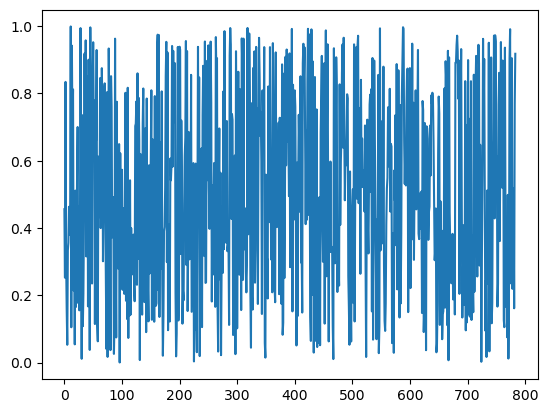

In [68]:
plt.plot(weight1)

In [69]:
print(weight1[456])
weight1 ,weight2, check , output= hidden(1,X_train_filter,weight1,weight2)

[0.71112631]


/var/folders/l8/ff1gcl6975n_zzc22b_6swxr0000gn/T/ipykernel_79769/802398337.py:6: RuntimeWarning: invalid value encountered in divide
  temp = (((i - min(arr))*diff)/diff_arr) + t_min


In [424]:
weight1

array([[-5.00411369e+01],
       [-5.00521062e+01],
       [-5.00842895e+01],
       [-5.00631605e+01],
       [-5.00161255e+01],
       [-5.00303631e+01],
       [-5.00478175e+01],
       [-5.00897469e+01],
       [-5.00827471e+01],
       [-5.00636287e+01],
       [-5.00862761e+01],
       [-5.00685609e+01],
       [-5.00546555e+01],
       [-5.00292624e+01],
       [-5.00690493e+01],
       [-5.00017435e+01],
       [-5.00423371e+01],
       [-5.00043147e+01],
       [-5.00694122e+01],
       [-5.00383075e+01],
       [-5.00329969e+01],
       [-5.00240511e+01],
       [-5.00278899e+01],
       [-5.00120890e+01],
       [-5.00539261e+01],
       [-5.00611930e+01],
       [-5.00344546e+01],
       [-5.00180908e+01],
       [-5.00218731e+01],
       [-5.00389962e+01],
       [-5.00616814e+01],
       [-5.00109593e+01],
       [-5.00548697e+01],
       [-5.00514979e+01],
       [-5.00399802e+01],
       [-5.00209190e+01],
       [-5.00794514e+01],
       [-5.00063927e+01],
       [-5.0

In [426]:
weight2

array([[0.18426752, 0.0055995 , 0.43310089],
       [0.69673463, 0.16620032, 0.18304994],
       [0.07902508, 0.75520992, 0.06524448],
       [0.18779301, 0.8467679 , 0.33457082],
       [0.96774502, 0.75180321, 0.39790293],
       [0.93481916, 0.34812943, 0.30136077],
       [0.15265258, 0.41757834, 0.66850454],
       [0.09345877, 0.52029385, 0.25571534],
       [0.76084862, 0.60627281, 0.6501333 ],
       [0.59542938, 0.442602  , 0.59117718],
       [0.58828593, 0.70355467, 0.16475938],
       [0.65713871, 0.85542826, 0.44621163],
       [0.74482648, 0.90100103, 0.26559933],
       [0.63459972, 0.45317954, 0.27302694],
       [0.68689987, 0.80625655, 0.64695772],
       [0.47961919, 0.52808093, 0.50089423],
       [0.97744539, 0.87390943, 0.57308821],
       [0.55016717, 0.48108908, 0.42521595],
       [0.35743393, 0.18067795, 0.49253454],
       [0.46296862, 0.67735415, 0.86690632],
       [0.33552374, 0.21273512, 0.23685095],
       [0.61994701, 0.88799984, 0.2710703 ],
       [0.

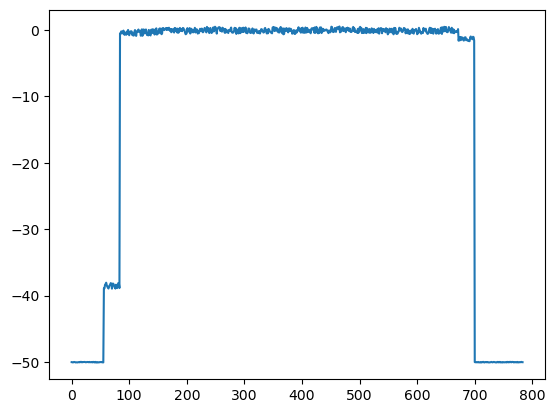

In [427]:
plt.plot(weight1)

In [428]:
weight1[456]

array([-0.00066275])

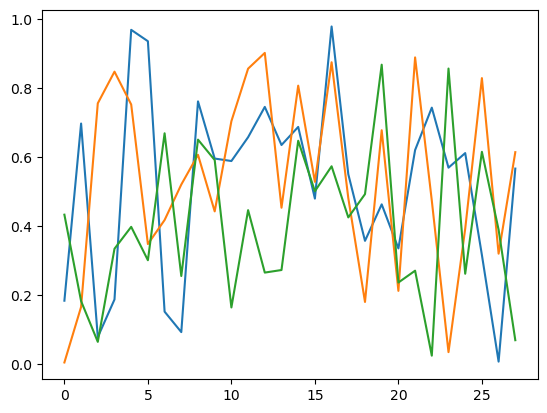

In [429]:
plt.plot(weight2)

In [430]:
def testingMemoryElementWork(inputImage,weight):
    result = []
    for item in inputImage:
        item = flattenInput(item)
        result.append(np.dot(item.T,weight))
    return result

In [431]:
# weight1 = weightInitialization(784,200)
# weight1 = weightUpdateThresholding(10,X_train_filter,weight1)

In [432]:
# weight1 = weightInitialization(784,20)
# weight1 = weightUpdateContainingMemoryElement(2,1,X_train_filter,weight1)

In [433]:
weight1[572]

array([0.2380638])

In [434]:
weight1

array([[-5.00411369e+01],
       [-5.00521062e+01],
       [-5.00842895e+01],
       [-5.00631605e+01],
       [-5.00161255e+01],
       [-5.00303631e+01],
       [-5.00478175e+01],
       [-5.00897469e+01],
       [-5.00827471e+01],
       [-5.00636287e+01],
       [-5.00862761e+01],
       [-5.00685609e+01],
       [-5.00546555e+01],
       [-5.00292624e+01],
       [-5.00690493e+01],
       [-5.00017435e+01],
       [-5.00423371e+01],
       [-5.00043147e+01],
       [-5.00694122e+01],
       [-5.00383075e+01],
       [-5.00329969e+01],
       [-5.00240511e+01],
       [-5.00278899e+01],
       [-5.00120890e+01],
       [-5.00539261e+01],
       [-5.00611930e+01],
       [-5.00344546e+01],
       [-5.00180908e+01],
       [-5.00218731e+01],
       [-5.00389962e+01],
       [-5.00616814e+01],
       [-5.00109593e+01],
       [-5.00548697e+01],
       [-5.00514979e+01],
       [-5.00399802e+01],
       [-5.00209190e+01],
       [-5.00794514e+01],
       [-5.00063927e+01],
       [-5.0

In [435]:
weight2

array([[0.18426752, 0.0055995 , 0.43310089],
       [0.69673463, 0.16620032, 0.18304994],
       [0.07902508, 0.75520992, 0.06524448],
       [0.18779301, 0.8467679 , 0.33457082],
       [0.96774502, 0.75180321, 0.39790293],
       [0.93481916, 0.34812943, 0.30136077],
       [0.15265258, 0.41757834, 0.66850454],
       [0.09345877, 0.52029385, 0.25571534],
       [0.76084862, 0.60627281, 0.6501333 ],
       [0.59542938, 0.442602  , 0.59117718],
       [0.58828593, 0.70355467, 0.16475938],
       [0.65713871, 0.85542826, 0.44621163],
       [0.74482648, 0.90100103, 0.26559933],
       [0.63459972, 0.45317954, 0.27302694],
       [0.68689987, 0.80625655, 0.64695772],
       [0.47961919, 0.52808093, 0.50089423],
       [0.97744539, 0.87390943, 0.57308821],
       [0.55016717, 0.48108908, 0.42521595],
       [0.35743393, 0.18067795, 0.49253454],
       [0.46296862, 0.67735415, 0.86690632],
       [0.33552374, 0.21273512, 0.23685095],
       [0.61994701, 0.88799984, 0.2710703 ],
       [0.

In [436]:
# Finding the Values for the Digits"

In [437]:
# results_0=printResults(X_train_filter_0,weight1)

# results_1=printResults(X_train_filter_1,weight1)
# results_2=printResults(X_train_filter_2,weight1)
# results_3=printResults(X_train_filter_3,weight1)
#results_4=printResults(X_train_filter_4,weight1)

In [438]:
#weight1

In [439]:
results_0 , resultRow_0 = printResultsBlockIncludingAnotherLayer(X_train_filter_0,weight1,weight2)

results_1 , resultRow_1 = printResultsBlockIncludingAnotherLayer(X_train_filter_1,weight1,weight2)
results_2  , resultRow_2 = printResultsBlockIncludingAnotherLayer(X_train_filter_2,weight1,weight2)

In [440]:
len(results_0)

5923

In [441]:
index1_results_0 = []
for index in range(len(results_0)):
    #print(results_0[index][0][0][1])
    index1_results_0.append(results_0[index][0][0][1])

In [442]:
def resultMax(result):
    maxValue = []
    for index in range(len(result)):
        maxValue.append(max(result[index][0][0]))
    return maxValue

In [443]:
maxValue0 = resultMax(results_0)
maxValue1 = resultMax(results_1)
maxValue2 = resultMax(results_2)

In [444]:
maxValue0

[-3.5044292430627975,
 -3.9192122597197265,
 -4.479344364184392,
 -5.17812205475145,
 -7.370323479976664,
 -5.67700925974242,
 -7.612213774025573,
 -3.1409445867880335,
 -5.988941209836481,
 -6.4157602425416504,
 -5.676409670266665,
 -3.7215303648962266,
 -5.030808920066645,
 -2.872786879899337,
 -3.822595609458467,
 -1.633796635088773,
 -4.347185128187848,
 -3.609958019675983,
 -2.524444885300939,
 -4.076019490662833,
 -5.174179469167094,
 -4.635310865761753,
 -4.175416092086785,
 -2.0730187880612223,
 -2.7116569479207007,
 -3.4496505063845646,
 -1.9563630506837026,
 -3.2821737371062536,
 -3.087760475419645,
 -2.642068294876033,
 -2.088875931758458,
 -3.5132839440016816,
 -3.762548364085382,
 -3.984914752437122,
 -4.632863962504943,
 -2.5899236536566552,
 -2.455991130691256,
 -3.9376628325004455,
 -4.779734377701633,
 -4.959774413524431,
 -3.3169244300501495,
 -3.622521207658956,
 -3.9216144654413965,
 -3.606663515989379,
 -3.6776602827542493,
 -5.29119649294556,
 -4.7260788315285,
 -

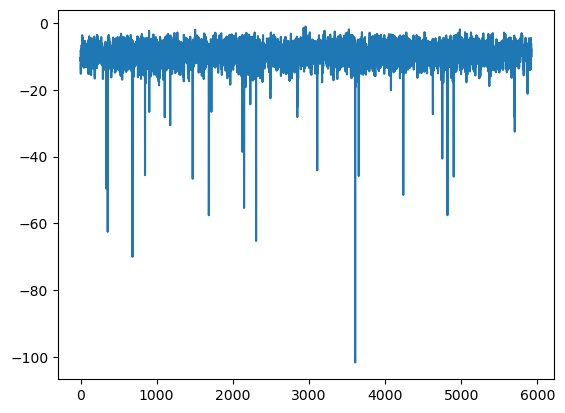

In [327]:
# maxValue0 = np.array(maxValue0)
# maxValue0 = maxValue0.reshape(-1,5923)
plt.plot(maxValue0)

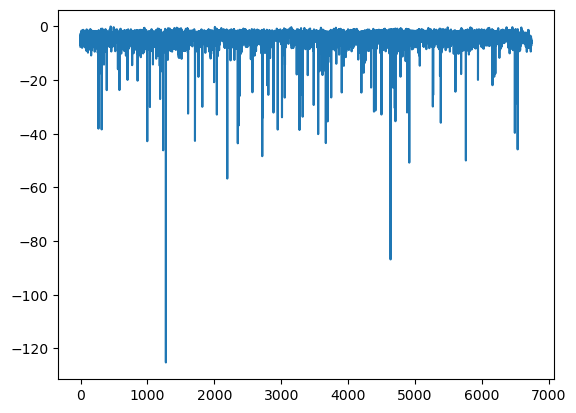

In [328]:
plt.plot(maxValue1)

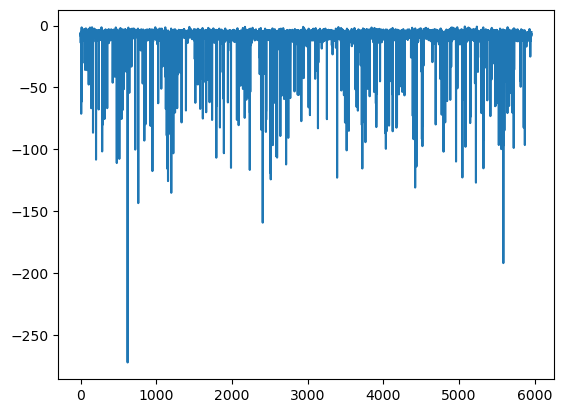

In [329]:
plt.plot(maxValue2)

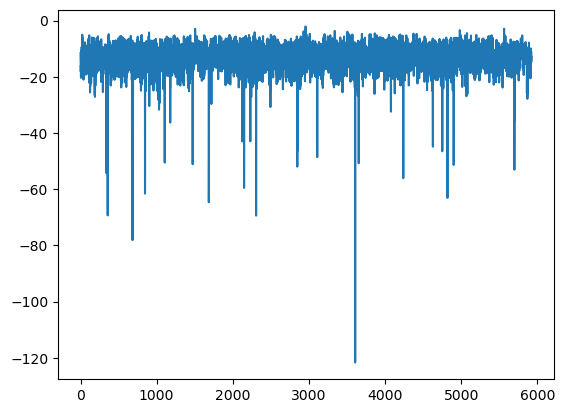

In [266]:
plt.plot(index1_results_0)

In [330]:
resultSum_0 = maxValue0
resultSum_1 = maxValue1
resultSum_2 = maxValue2

In [267]:
results_0[0][0].shape

(1, 3)

In [268]:
results_0[0]

array([[[ -8.30049652, -11.60981595,  -9.6689546 ]]])

In [269]:
results_0[0][0][0][1]

-11.609815954470603

In [270]:
results_1[1]

array([[[-2.97095777, -5.05354842, -2.61352763]]])

In [271]:
results_1[1][0][0][1]

-5.053548419825815

In [272]:
results_1[0][0][0][1]

-9.608197478423572

In [273]:
results_2[0]

array([[[ -6.83806595, -11.17104491,  -8.95886187]]])

In [274]:
results_1[0]

array([[[-9.98793388, -9.60819748, -7.56046268]]])

In [275]:
resultRow_2

array([[[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[-0.76816308]],

       [[-1.26163324]],

       [[-0.81085336]],

       [[ 0.14439374]],

       [[ 0.610247  ]],

       [[-0.09148648]],

       [[-0.94534647]],

       [[-0.82057833]],

       [[-0.49878106]],

       [[-0.79807789]],

       [[-0.82918499]],

       [[-0.87011203]],

       [[-1.01000581]],

       [[-0.552414  ]],

       [[-2.20249363]],

       [[-2.30540837]],

       [[-1.81105029]],

       [[-1.08941695]],

       [[ 0.32256796]],

       [[-0.02805558]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]]])

In [276]:
results_0[0]

array([[[ -8.30049652, -11.60981595,  -9.6689546 ]]])

In [277]:
resultRow_0

array([[[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[-0.70488852]],

       [[-1.12650653]],

       [[-0.96662391]],

       [[ 0.36615084]],

       [[-0.19813079]],

       [[-0.93170753]],

       [[-1.21326502]],

       [[-2.42095711]],

       [[-0.0147042 ]],

       [[-1.09585906]],

       [[-1.72830531]],

       [[-1.65417004]],

       [[-0.36825633]],

       [[-0.93238744]],

       [[-0.75029742]],

       [[-1.86533582]],

       [[-1.11037886]],

       [[-0.32256171]],

       [[-1.18090054]],

       [[-0.85697357]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]]])

In [278]:
resultRow_1

array([[[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.06555576]],

       [[-0.30563285]],

       [[-0.1469632 ]],

       [[-0.53680486]],

       [[-0.63264686]],

       [[-0.42351406]],

       [[-0.46760072]],

       [[-0.81806711]],

       [[-0.09144958]],

       [[-0.45119334]],

       [[-0.30387651]],

       [[-0.7678757 ]],

       [[-0.69886273]],

       [[-0.59294714]],

       [[-0.59348864]],

       [[-0.57156719]],

       [[ 0.21651323]],

       [[-0.65703139]],

       [[-0.9439336 ]],

       [[-2.10489311]],

       [[ 0.        ]],

       [[ 0.        ]],

       [[ 0.        ]]])

In [279]:
results_1[0]

array([[[-9.98793388, -9.60819748, -7.56046268]]])

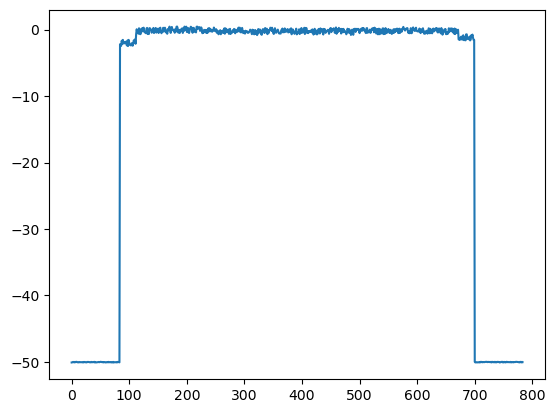

In [280]:
plt.plot(weight1)

In [281]:
results_0 , resultSum_0 =printResultsBlock(X_train_filter_0,weight1)

results_1 , resultSum_1 =printResultsBlock(X_train_filter_1,weight1)
results_2 , resultSum_2 =printResultsBlock(X_train_filter_2,weight1)

In [282]:
len(results_0[0])

112

In [283]:
def findMaxNode(result):
    max_ = 0
    indices = []
    ansMode = []
    for images in result:
        max_index = -1
        max_ = 0
        for index in range(28):
            if(images[index] > max_):
                max_ = images[index]
                max_index = index
        
        indices.append(max_index)
        
    data = Counter(indices)
    mode = statistics.mode(indices)
    return data,indices,mode

In [284]:
data_0 , indices_0 , mode_0 = findMaxNode(results_0)
data_1 , indices_1 , mode_1 = findMaxNode(results_1)
data_2 , indices_2 , mode_2 = findMaxNode(results_2)

In [285]:
data_0

Counter({26: 2385,
         18: 69,
         27: 380,
         21: 1145,
         17: 352,
         23: 875,
         -1: 659,
         22: 20,
         24: 31,
         20: 1,
         25: 3,
         19: 3})

In [286]:
mode_0

26

In [287]:
data_1

Counter({23: 696,
         26: 3563,
         21: 235,
         27: 77,
         -1: 1604,
         24: 10,
         18: 376,
         22: 84,
         17: 87,
         20: 4,
         19: 5,
         25: 1})

In [288]:
mode_1

26

In [289]:
data_2

Counter({-1: 482,
         26: 2700,
         17: 1229,
         24: 267,
         27: 114,
         23: 338,
         21: 761,
         20: 23,
         18: 26,
         22: 13,
         25: 4,
         19: 1})

In [290]:
mode_2

26

In [97]:
#st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))
#do this and maximum val and then go with variations

In [98]:
#results_0=printResultsBlock(X_train_filter_0,weight1)
#results_1=printResultsBlock(X_train_filter_1,weight1)
#results_2=printResultsBlock(X_train_filter_2,weight1)
# results_3=printResultsBlock(X_train_filter_3,weight1)
# results_4=printResultsBlock(X_train_filter_4,weight1)

In [1608]:
#results_0

In [1609]:
#results_1

In [1610]:
#results_2

In [1611]:
#results_3

In [445]:
meanOfTrainingData_0 = []
medianOfTrainingData_0 = []
for index in range(len(resultSum_0)):
    meanOfTrainingData_0.append(np.mean(resultSum_0[index]))
    medianOfTrainingData_0.append(np.median(resultSum_0[index]))
    trainingMeanValue_0 = np.mean(medianOfTrainingData_0)

In [446]:
meanOfTrainingData_1 = []
medianOfTrainingData_1 = []
for index in range(len(resultSum_1)):
    meanOfTrainingData_1.append(np.mean(resultSum_1[index]))
    medianOfTrainingData_1.append(np.median(resultSum_1[index]))
    trainingMeanValue_1 = np.mean(medianOfTrainingData_1)

In [447]:
meanOfTrainingData_2 = []
medianOfTrainingData_2 = []
for index in range(len(resultSum_2)):
    meanOfTrainingData_2.append(np.mean(resultSum_2[index]))
    medianOfTrainingData_2.append(np.median(resultSum_2[index]))
    trainingMeanValue_2 = np.mean(medianOfTrainingData_2)

In [448]:
# meanOfTrainingData_3 = []
# medianOfTrainingData_3 = []
# for index in range(len(results_3)):
#     meanOfTrainingData_3.append(np.mean(results_3[index]))
#     medianOfTrainingData_3.append(np.median(results_3[index]))
#     trainingMeanValue_3 = np.mean(medianOfTrainingData_3)

In [449]:
# meanOfTrainingData_4 = []
# medianOfTrainingData_4 = []
# for index in range(len(results_4)):
#     meanOfTrainingData_4.append(np.mean(results_4[index]))
#     medianOfTrainingData_4.append(np.median(results_4[index]))
#     trainingMeanValue_4 = np.mean(medianOfTrainingData_4)

In [450]:
trainingMeanValue_0

-9.372710565137238

In [451]:
trainingMeanValue_1

-4.447624211691775

In [452]:
trainingMeanValue_2

-10.142375406346115

In [453]:
# trainingMeanValue_3

In [454]:
# trainingMeanValue_4

In [455]:
outputTrainingValues = np.array([trainingMeanValue_0,trainingMeanValue_1,trainingMeanValue_2])#,trainingMeanValue_3,trainingMeanValue_4])

In [456]:
outputTrainingValuesMax = np.array([9,10,17])

In [457]:
# Prediction

In [458]:
def prediction(data,finalWeight):
        predict = []
        for item in data:
            item = flattenInput(item)
            res = np.dot(item.T,finalWeight)
            res = np.median(res)
            distance = np.abs(outputTrainingValues - res)
            predict.append(np.argmin(distance))
        return predict

In [459]:
def predictionBlocks(data,finalWeight):
        predict = []
        for item in data:
            item = flattenInput(item)
            res = np.dot(item.T,finalWeight)
            distance = np.abs(outputTrainingValues - res)
            predict.append(np.argmin(distance))
        return predict

In [460]:
def predictionMax(data,finalWeight):
        predict = []
        results, resultSum = printResultsBlockIncludingAnotherLayer(data,weight1 , weight2)
        #data_ , indices_ , mode_ = findMaxNode(results)
        predictMax = []
        combinedPred = []
        for index in range(len(results)):
            #print(resultSum[index])
            #print(indices_[index])
            distance = np.abs(outputTrainingValues - results[index])
            #distanceMax = np.abs(outputTrainingValuesMax - indices_[index]) 
            
            predict.append(np.argmin(distance))
            #predictMax.append(np.argmin(distanceMax))
            
            
            #print(predictDist)
            #if indices_[index] == 21:
            #    predictMax.append(0)
            #elif indices_[index] == 6:
            #    predictMax.append(1)
            #elif indices_[index] == 19:
            #    predictMax.append(2)
            
           
                #predict.append(0)
                #if predictDist == 0 and predictMode == 1:
                #    predict.append(0)
                #elif predictDist == 1 and predictMode == 1:
                #    predict.append(1)
                #elif predictDist == 2 and predictMode == 1:
                #    predict.append(2)
        return predict , predictMax

In [461]:
#pred = predictionBlocks(X_test_filter ,weight1)

In [462]:
#pred = prediction(X_test_filter ,weight1)

In [463]:
pred , predictMax =  predictionMax(X_test_filter,weight1)

In [464]:
np.unique(pred)

array([0, 1, 2])

In [465]:
np.unique(predictMax)

array([], dtype=float64)

In [466]:
np.unique(Y_test_filter)

array([0, 1, 2], dtype=uint8)

In [467]:
def compute_accuracy(y_true, y_pred):
    correct_predictions = 0
    accuracy = 0
    for true, predicted in zip(y_true, y_pred):
        if true == predicted:
            correct_predictions += 1
            accuracy = correct_predictions/len(y_true)
    return accuracy

In [468]:
acc = compute_accuracy(Y_test_filter,pred)

In [469]:
acc

0.4559898315856371

In [470]:
acc = compute_accuracy(Y_test_filter,predictMax)

In [471]:
acc

0

# Calculating Individual Accuracies

In [472]:
def prediction_0(X, w):
    result = []
    res = printResultsBlock(X,w)
    indices = findMaxNode(res)
    
    for info in indices:
        if info == 8:
            result.append(0)
        else:
            result.append(-1)
    
    return result
        

In [473]:
pred_for_0 , predMax_0 = predictionMax(X_test_filter_0 ,weight1)

In [474]:
acc_0 = compute_accuracy(Y_test_filter_0,predMax_0)

In [475]:
acc_0

0

In [476]:
pred_for_1 , predMax_1= predictionMax(X_test_filter_1 ,weight1)

In [477]:
acc_1 = compute_accuracy(Y_test_filter_1,predMax_1)

In [478]:
acc_1

0

In [479]:
pred_for_2 , predMax_2 = predictionMax(X_test_filter_2,weight1)

In [480]:
acc_2 = compute_accuracy(Y_test_filter_2,predMax_2)

In [481]:
acc_2

0

In [482]:
#pred_for_3 = prediction(X_test_filter_3,weight1)

In [483]:
#acc_3 = compute_accuracy(Y_test_filter_3,pred_for_3)

In [484]:
#acc_3

In [485]:
#pred_for_4 = prediction(X_test_filter_4,weight1)

In [486]:
#acc_4 = compute_accuracy(Y_test_filter_4,pred_for_4)

In [487]:
#acc_4

# Visualization

In [488]:
#medianOfTrainingData_0,medianOfTrainingData_1,medianOfTrainingData_4

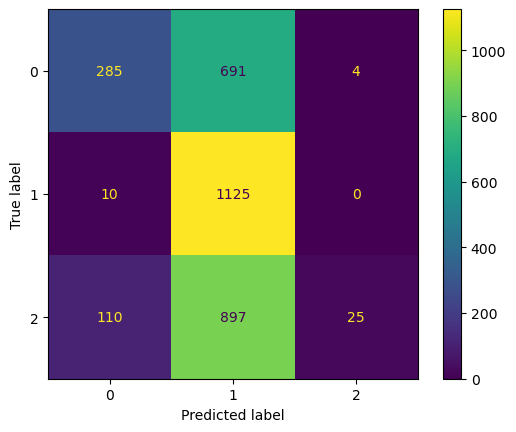

In [489]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(Y_test_filter,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1 ,2])

cm_display.plot()
plt.show()

In [490]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(Y_test_filter,predictMax)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1 ,2])

cm_display.plot()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [3147, 0]

In [548]:
len(medianOfTrainingData_0)

5923

In [ ]:
if _name_ == "_main_":
    summary = []

    for key_size in key_sizes:
        attempts_list = []
        for i in range(total_runs):
            attempts = find_nonce(message, key_size)
            attempts_list.append(attempts)
        average_attempts = round(sum(attempts_list) / total_runs, 4)
        sum_ = 0
        for a in attempts_list:
            sum_ = sum_ + (a-average_attempts)**2)
        variance = sum_ / total_runs
        standard_deviation = round(variance ** 0.5, 4)
        summary.append((key_size, average_attempts, standard_deviation))